# Test 01

In [1]:
# load data
from fivedreg.data.load_data import load_data

data = load_data(
    "../data/coursework_dataset.pkl",
    missing_strategy='ignore',
    standardize=True,  # the scaler is only fitted on the training set
    split_ratios=[0.8, 0.1, 0.1],
    random_seed=42,
)
data.keys()

Data split: train=4000, val=500, test=500


dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test', 'scaler'])

In [2]:
# create and train
from fivedreg.model.naive_nn import NaiveMLP
from fivedreg.trainer.nn_trainer import NNTrainer

mlp_config = {
    'hidden_dims': [128, 128],
    'dropout': 0.0,
    'activation': 'relu',
}

training_config = {
    'learning_rate': 1e-3,
    'batch_size': 32,
    'epochs': 1000,
    'early_stopping_patience': 0,
    'weight_decay': 0.0,
    'checkpoint_dir': './checkpoints',
}

trainer = NNTrainer(
    model_class=NaiveMLP,
    model_config=mlp_config,
    training_config=training_config,
    device='cpu',
)

train_results = trainer.train(
    X_train=data['X_train'],
    y_train=data['y_train'],
    X_val=data['X_val'],
    y_val=data['y_val'],
    verbose=False,
)

print(train_results.keys())

Trainer initialized on device: cpu
Model: NaiveMLP(hidden_dims=[128, 128], dropout=0.0, n_params=17,409)
dict_keys(['model', 'history', 'best_epoch', 'best_val_loss'])


In [3]:
# evaluate
eval_results = trainer.evaluate(
    X_test=data['X_test'],
    y_test=data['y_test'],
)
print(eval_results)

{'mse': 0.0008934069192036986, 'rmse': np.float64(0.029889913335499965), 'mae': 0.023023175075650215}


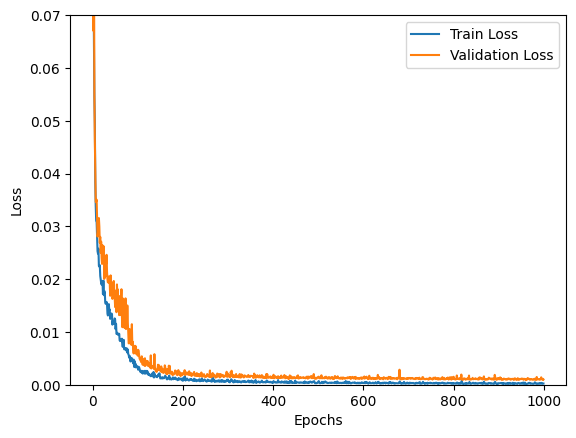

In [4]:
# training history visualization
from matplotlib import pyplot as plt
train_loss = train_results['history']['train_loss']
val_loss = train_results['history']['val_loss']

plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.07)
plt.legend()
plt.show()